In [45]:
import pandas as pd 

# Leer archivo Excel (DOS)

df = pd.read_excel (r'/Users/gerenciafinanciera/Desktop/ADUANASCARGA/HECADUANAS/DO.xls')
df.head()

,Cliente
0,CHANEME COMERCIAL S A
1,CHANEME COMERCIAL S A
2,LUBEMOTOR S A S ZOMAC
3,GRAN PARED S A S
4,GRANITI PISOS Y CORTINAS S A S


In [46]:
df = df["Cliente"].value_counts().rename_axis('Cliente').reset_index(name='DOS')
df.head()

,Cliente,DOS
0,NOVARTIS DE COLOMBIA S A,956
1,CHANEME COMERCIAL S A,230
2,LABORATORIOS BUSSIE S A,130
3,GABRIEL DE COLOMBIA S A,109
4,HARMEX S A,71


In [47]:
df["DOS"] = df["DOS"].astype(int)
df.dtypes

Cliente    object
DOS         int64
dtype: object

In [48]:
#Segunda lectura de documento (Reporte de facturas)

df2 = pd.read_excel (r'/Users/gerenciafinanciera/Desktop/ADUANASCARGA/HECADUANAS/REPORTEFACTU.xls')
df2["FACTURACION"] = df2["FACTURACION"].astype(int)

In [49]:
df2.head()

,Cliente,FACTURACION
0,NOVARTIS DE COLOMBIA S A,812443005
1,CHANEME COMERCIAL S A,191789786
2,PANALPINA S A,96645098
3,CHM MINERIA S A S,95178800
4,PARTEQUIPOS MAQUINARIA S A S,86881312


In [50]:
df_1= df.join(df2.set_index('Cliente'), on='Cliente')

In [51]:
pd.set_option("max_columns", None) #Showing only two columns
pd.set_option("max_rows", None)
df_1.head()

,Cliente,DOS,FACTURACION
0,NOVARTIS DE COLOMBIA S A,956,812443005.0
1,CHANEME COMERCIAL S A,230,191789786.0
2,LABORATORIOS BUSSIE S A,130,85007589.0
3,GABRIEL DE COLOMBIA S A,109,29925366.0
4,HARMEX S A,71,48822296.0


In [52]:
# Hasta aca corre bien el codigo con lo que se pide. Cliente + DOS + Facturacion. Ahora voy a hacer el codigo para totalizar el archivo 
# FACTURADETALLADA.XLS

In [53]:
df_3 = pd.read_excel (r'/Users/gerenciafinanciera/Desktop/ADUANASCARGA/HECADUANAS/FACTURADETALLADA.xls')
df_3.head()

,Cliente,Propios,Terceros,Anticipo,I.V.A.,R/Fte.,Cree,R/Ica,R/Iva,Est.,Sec
0,GPKARS S A S,1000000,335035,0,190000.0,110000.0,0,9660,0,AFE,AD
1,GPKARS S A S,1000000,485635,0,190000.0,110000.0,0,9660,0,AFE,AD
2,GPKARS S A S,1000000,455515,0,190000.0,110000.0,0,9660,0,AFE,AD
3,GPKARS S A S,1000000,365155,0,190000.0,110000.0,0,9660,0,AFE,AD
4,GPKARS S A S,1000000,515755,0,190000.0,110000.0,0,9660,0,AFE,AD


In [54]:
df3 = df_3.groupby(['Cliente'],as_index = False).sum()
df3.head()

,Cliente,Propios,Terceros,Anticipo,I.V.A.,R/Fte.,Cree,R/Ica,R/Iva
0,A. MENARINI LATIN AMERICA S L U SUCURSAL COLOMBIA,15303663,19327431,0,2907695.97,1682842.93,0,147832,0
1,ACTIFARMA S A,3380737,2519708,4936000,642340.03,284404.31,0,32657,0
2,AJ_H IMPOR-EXPOR S.A.S,434000,32786996,37158000,82460.00,37940.00,0,0,0
3,ARRAUTH AGUIRRE MARTIN ANTONIO,500000,200000,0,95000.00,0.00,0,0,0
4,ASIAN TRADE S A S,2051000,43917314,45372742,389690.00,143780.00,0,19812,0


In [55]:
#FUNCIONA EL CODIGO PARA TOTALIZAR 

In [56]:
#Ahora queremos integrar todo lo que hemos hecho en el cuadro final  que es df_1 con df3

In [57]:
df_final= df_1.join(df3.set_index('Cliente'), on='Cliente')
df_final.head()

,Cliente,DOS,FACTURACION,Propios,Terceros,Anticipo,I.V.A.,R/Fte.,Cree,R/Ica,R/Iva
0,NOVARTIS DE COLOMBIA S A,956,812443005.0,813968005.0,6.316302e+08,1.377113e+07,1.546539e+08,66261223.16,0.0,7862928.0,23198077.0
1,CHANEME COMERCIAL S A,230,191789786.0,192143261.0,1.285418e+08,1.068210e+07,3.650722e+07,21131363.62,0.0,1856103.0,5476075.0
2,LABORATORIOS BUSSIE S A,130,85007589.0,85957089.0,1.295857e+09,1.373921e+09,1.633185e+07,9454754.79,0.0,830345.0,2449782.0
3,GABRIEL DE COLOMBIA S A,109,29925366.0,29925366.0,1.326191e+08,0.000000e+00,5.685820e+06,3291790.26,0.0,289068.0,852878.0
4,HARMEX S A,71,48822296.0,48822296.0,1.768289e+08,1.755000e+08,9.276236e+06,4739752.56,0.0,0.0,1391436.0


In [58]:
#Convertir tabla a excel
df_final.to_excel("TrabajoJefe.xlsx")  

In [59]:
#Lectura de otro documento para unir junto a los otros dos
df3 = pd.read_excel(r'/Users/gerenciafinanciera/Desktop/ADUANASCARGA/HECADUANAS/propios.xls')
df3["INGRESO PROPIO"] = df3["INGRESO PROPIO"].astype(int)
df3.head()


,Nombre de Cliente,INGRESO PROPIO
0,A. MENARINI LATIN AMERICA S L U SUCURSAL COLOMBIA,1773618
1,AJ_H IMPOR-EXPOR S.A.S,434000
2,ARRAUTH AGUIRRE MARTIN ANTONIO,500000
3,ASIAN TRADE S A S,1328000
4,AUTOS ITALIANOS DE COLOMBIA S A SUCURSAL COLO...,1927000


In [60]:
df_2= df_1.join(df3.set_index('Nombre de Cliente'), on='Cliente')

In [61]:
df_2.head()

,Cliente,DOS,FACTURACION,INGRESO PROPIO
0,NOVARTIS DE COLOMBIA S A,956,812443005.0,246024044.0
1,CHANEME COMERCIAL S A,230,191789786.0,56371101.0
2,LABORATORIOS BUSSIE S A,130,85007589.0,17675879.0
3,GABRIEL DE COLOMBIA S A,109,29925366.0,13476652.0
4,HARMEX S A,71,48822296.0,15812337.0


In [62]:
#col = df_2.loc[: , "DOS"]

In [63]:
#col

In [64]:
df_2 ["%DOS"] = ((df_2["DOS"]) / df_2["DOS"].sum())*100
#df_2["%TERCEROS"] = ((df_2["Terceros"]) / df_2["Terceros"].sum())*100
df_2["%PROPIO"] = ((df_2["INGRESO PROPIO"]) / df_2["INGRESO PROPIO"].sum())*100

In [65]:
df_2.head()

,Cliente,DOS,FACTURACION,INGRESO PROPIO,%DOS,%PROPIO
0,NOVARTIS DE COLOMBIA S A,956,812443005.0,246024044.0,40.802390,38.500629
1,CHANEME COMERCIAL S A,230,191789786.0,56371101.0,9.816475,8.821588
2,LABORATORIOS BUSSIE S A,130,85007589.0,17675879.0,5.548442,2.766122
3,GABRIEL DE COLOMBIA S A,109,29925366.0,13476652.0,4.652155,2.108979
4,HARMEX S A,71,48822296.0,15812337.0,3.030303,2.474494


In [66]:
df_2["DOS"].sum()

2343

In [67]:
df_2["IPDO "] = df_2["INGRESO PROPIO"]/ df_2["DOS"]

In [68]:
df_2

,Cliente,DOS,FACTURACION,INGRESO PROPIO,%DOS,%PROPIO,IPDO
0,NOVARTIS DE COLOMBIA S A,956,812443005.0,246024044.0,40.802390,38.500629,2.573473e+05
1,CHANEME COMERCIAL S A,230,191789786.0,56371101.0,9.816475,8.821588,2.450917e+05
2,LABORATORIOS BUSSIE S A,130,85007589.0,17675879.0,5.548442,2.766122,1.359683e+05
3,GABRIEL DE COLOMBIA S A,109,29925366.0,13476652.0,4.652155,2.108979,1.236390e+05
4,HARMEX S A,71,48822296.0,15812337.0,3.030303,2.474494,2.227090e+05
5,PARTEQUIPOS MAQUINARIA S A S,70,86881312.0,22438440.0,2.987623,3.511421,3.205491e+05
6,CHM MINERIA S A S,65,95178800.0,47429000.0,2.774221,7.422227,7.296769e+05
7,PARTEQUIPOS S A S,62,73487934.0,NaN,2.646180,NaN,NaN
8,LUBRIRETENES Y RODAMIENTOS S A S,60,72517471.0,23623950.0,2.560819,3.696943,3.937325e+05
9,BELTRAN BERMUDEZ LUIS ALBERTO,50,23114201.0,7878475.0,2.134016,1.232913,1.575695e+05


In [69]:
#guarda excel final 
#df_2.to_excel("Reporte Ingresos primer trimestre 2020.xlsx")  

<AxesSubplot:ylabel='%DOS'>

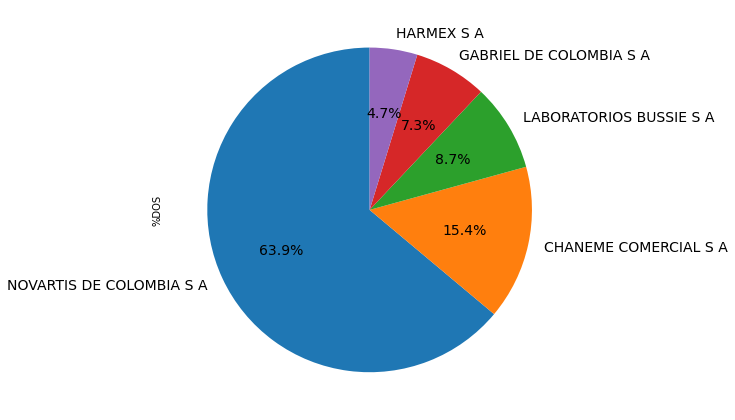

In [92]:
#Ploteo de datos de importancia. 
#Se busca la grafica que mejor se adapte a lo que requiere el cliente. 
#En estas graficas solo se tienen en cuenta a los 5 primeros clientes en terminos de DOS.

import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
ax1 = plt.subplot(121, aspect='equal')
df_2.head().plot(kind='pie', y = '%DOS', ax=ax1, autopct='%1.1f%%', 
startangle=90, shadow=False,labels=df_2['Cliente'], legend = False, fontsize=14)


<AxesSubplot:title={'center':'%DOS por cliente'}, ylabel='Cliente'>

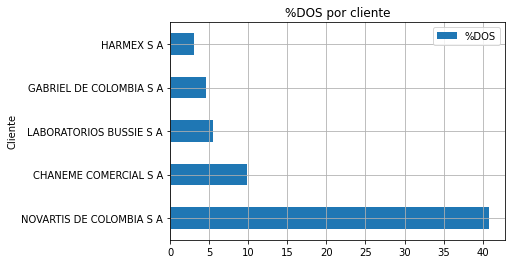

In [91]:
df_2.head().plot(x="Cliente", y="%DOS", kind='barh', ax=None, 
               subplots=False, sharex=None, sharey=False, layout=None, figsize=None, 
               use_index=True, title="%DOS por cliente", grid=True, legend=True, style=None, logx=False, 
               logy=False, loglog=False, xticks=None, yticks=None, xlim=0, ylim=None, rot=None,
               fontsize=None, colormap=None, table=False, yerr=None, xerr=None, secondary_y=False, 
               sort_columns=False)



